# Project 1

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
data = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTrain_carListings.zip')

In [5]:
data.head(10)

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler
5,37944,2017,5362,FL,Jeep,Wrangler
6,18995,2010,69431,NH,Ford,F-1504WD
7,28000,2015,35090,WI,Ford,ExplorerXLT
8,10995,2012,35100,NY,Hyundai,Sonata4dr
9,32991,2017,14238,TX,Kia,SorentoSX


In [6]:
data.shape

(500000, 6)

In [7]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

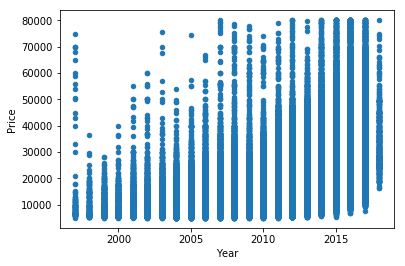

In [8]:
data.plot(kind='scatter', y='Price', x='Year')

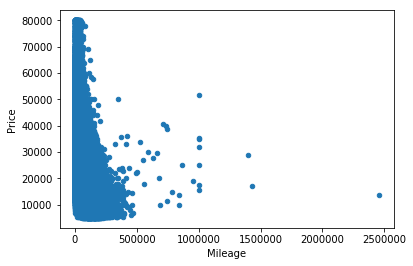

In [9]:
data.plot(kind='scatter', y='Price', x='Mileage')

In [10]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

# Exercise P1.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

Submit the prediction of the testing set to Kaggle
https://www.kaggle.com/c/miia4200-20191-p1-usedcarpriceprediction

#### Evaluation:
- 25% - Performance of the model in the Kaggle Private Leaderboard
- 25% - Notebook explaining the modeling process


In [11]:
data_test = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/dataTest_carListings.zip', index_col=0)

In [12]:
data_test.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2015,23388,OH,Ford,EscapeFWD
1,2014,45061,PA,Ford,EscapeSE
2,2007,101033,WI,Toyota,Camry4dr
3,2015,13590,HI,Jeep,Wrangler
4,2009,118916,CO,Dodge,Charger4dr


In [13]:
data_test.shape

(250000, 5)

### Analisis de la Data

In [14]:
data.dtypes

Price       int64
Year        int64
Mileage     int64
State      object
Make       object
Model      object
dtype: object

In [15]:
#sns.distplot(data["Price"]);

In [16]:
#sns.pairplot(data);

In [17]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [18]:
data1=data[(data["Model"]=="Wrangler") & (data["Year"]<=2017)]

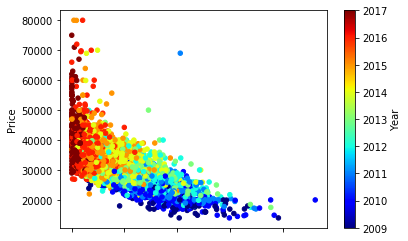

In [19]:
data1.plot(kind='scatter', y='Price', x='Mileage',c="Year",colormap='jet')

### Identificacion de Atipicos

### Preparacion de la Data

In [20]:
import category_encoders as ce

In [21]:
data['Year_s']=data[str('Year')]

In [22]:
data.head(5)

,Price,Year,Mileage,State,Make,Model,Year_s
0,21490,2014,31909,MD,Nissan,MuranoAWD,2014
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,2016
2,20925,2016,24633,SC,Hyundai,Santa,2016
3,14500,2012,84026,OK,Jeep,Grand,2012
4,32488,2013,22816,TN,Jeep,Wrangler,2013


In [23]:
X_1=pd.get_dummies(data['Year_s'], prefix='Y')

In [24]:
X_1.head(5)

,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,Y_2006,...,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
data2=pd.DataFrame(data['State'])

In [26]:
data2.describe()

,State
count,500000
unique,51
top,TX
freq,57153


In [27]:
data2.head()

,State
0,MD
1,KY
2,SC
3,OK
4,TN


In [28]:
X_2 = ce.BinaryEncoder().fit_transform(data2)

In [29]:
X_2.head(5)

,State_0,State_1,State_2,State_3,State_4,State_5,State_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,1


In [30]:
data3=pd.DataFrame(data['Make'])

In [31]:
data3.describe()

,Make
count,500000
unique,38
top,Ford
freq,78627


In [32]:
X_3 = ce.BinaryEncoder().fit_transform(data3)

In [33]:
X_3.head(5)

,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,Make_6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [34]:
data4=pd.DataFrame(data['Model'])
X_4 = ce.BinaryEncoder().fit_transform(data4)
X_4.head()

,Model_0,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,1


In [35]:
X =pd.concat([data['Mileage'],X_1,X_2,X_3,X_4],axis=1)

In [36]:
X.head(5)

,Mileage,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,...,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10
0,31909,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,25741,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,24633,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,84026,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,22816,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [37]:
y = data['Price']

### Division del archivo en train y test para la preparacion del modelo

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [39]:
X_train.shape

(250000, 48)

In [40]:
X_train.head(10)

,Mileage,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,...,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10
315366,18423,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
196832,16162,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
187640,70974,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,0,1
418842,82327,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
72547,32588,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,1,0,1
277072,39210,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,1
179187,30075,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,1
453628,89355,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
249295,22646,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,1,0
474351,33137,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


In [41]:
y_train.head(10)

315366    29970
196832    32999
187640    13995
418842    10499
72547     15999
277072    17280
179187    41274
453628    22995
249295    17600
474351    22500
Name: Price, dtype: int64

In [42]:
data['ind']=data.index
data.head(5)

,Price,Year,Mileage,State,Make,Model,Year_s,ind
0,21490,2014,31909,MD,Nissan,MuranoAWD,2014,0
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,2016,1
2,20925,2016,24633,SC,Hyundai,Santa,2016,2
3,14500,2012,84026,OK,Jeep,Grand,2012,3
4,32488,2013,22816,TN,Jeep,Wrangler,2013,4


### Identificacion de que muestra del data train usaremos para el modelo (train interno) y para el test interno 

In [43]:
Selec_train=pd.DataFrame(X_train.index)
Selec_train['ind']=Selec_train.iloc[:,0]
Selec_train['Select']="train"
Selec_train=Selec_train[['ind','Select']]
Selec_train.head(5)

,ind,Select
0,315366,train
1,196832,train
2,187640,train
3,418842,train
4,72547,train


In [44]:
Selec_test=pd.DataFrame(X_test.index)
Selec_test['ind']=Selec_test.iloc[:,0]
Selec_test['Select']="test"
Selec_test=Selec_test[['ind','Select']]
Selec_test.head(5)

,ind,Select
0,104241,test
1,199676,test
2,140199,test
3,132814,test
4,408697,test


In [45]:
Selec = Selec_train.append(pd.DataFrame(data = Selec_test), ignore_index=True)
Selec.tail(5)

,ind,Select
499995,466228,test
499996,197602,test
499997,15038,test
499998,376026,test
499999,155686,test


In [46]:
data=pd.merge(data,Selec,on='ind',how='left')
data.head(5)

,Price,Year,Mileage,State,Make,Model,Year_s,ind,Select
0,21490,2014,31909,MD,Nissan,MuranoAWD,2014,0,test
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,2016,1,train
2,20925,2016,24633,SC,Hyundai,Santa,2016,2,test
3,14500,2012,84026,OK,Jeep,Grand,2012,3,train
4,32488,2013,22816,TN,Jeep,Wrangler,2013,4,train


In [47]:
data.shape

(500000, 9)

## Modelaje

### Modelo 1 - Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

clf = DecisionTreeRegressor(max_depth=20, random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4530.799898844249

In [49]:
y_train.shape

(250000,)

In [50]:
# fit and predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred.head(5)

,0
0,17980.551724
1,19222.071429
2,14591.142857
3,17812.000000
4,13045.891775


### Analisis de prediccion de precios

In [51]:
y_pred_selec=pd.merge(y_pred,Selec_test,left_index=True, right_index=True)
y_pred_selec['Price_pred']=y_pred_selec.iloc[:,0]
y_pred_selec=y_pred_selec[['ind','Select','Price_pred']]
y_pred_selec.head(5)

,ind,Select,Price_pred
0,104241,test,17980.551724
1,199676,test,19222.071429
2,140199,test,14591.142857
3,132814,test,17812.000000
4,408697,test,13045.891775


In [52]:
y_train.head()

315366    29970
196832    32999
187640    13995
418842    10499
72547     15999
Name: Price, dtype: int64

In [53]:
pd_y_train=pd.DataFrame(y_train)
pd_y_train['Price_pred']=pd_y_train['Price']
pd_y_train = pd_y_train.reset_index(drop=True)
pd_y_train.head()

,Price,Price_pred
0,29970,29970
1,32999,32999
2,13995,13995
3,10499,10499
4,15999,15999


In [54]:
y_train_ind=pd.DataFrame(y_train.index)
y_train_ind.head()

,0
0,315366
1,196832
2,187640
3,418842
4,72547


In [55]:
y_price=pd.concat([y_train_ind,pd_y_train],axis=1)
y_price['ind']=y_price.iloc[:,0]
y_price=y_price[['ind','Price_pred']]
y_price.head(5)

,ind,Price_pred
0,315366,29970
1,196832,32999
2,187640,13995
3,418842,10499
4,72547,15999


In [56]:
y_price.shape

(250000, 2)

In [57]:
Price = y_pred_selec.append(pd.DataFrame(data = y_price), ignore_index=True, sort='ind')
Price=Price[['ind','Price_pred']]
Price.tail(5)

,ind,Price_pred
499995,259178,11994.0
499996,365838,17900.0
499997,131932,11500.0
499998,146867,19900.0
499999,121958,19000.0


In [58]:
data=pd.merge(data,Price,on='ind',how='left')
#data['Dif']=data[data['Price']-data['Price_pred']]

In [59]:
data.head(10)

,Price,Year,Mileage,State,Make,Model,Year_s,ind,Select,Price_pred
0,21490,2014,31909,MD,Nissan,MuranoAWD,2014,0,test,21033.022222
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe,2016,1,train,21250.000000
2,20925,2016,24633,SC,Hyundai,Santa,2016,2,test,24151.625000
3,14500,2012,84026,OK,Jeep,Grand,2012,3,train,14500.000000
4,32488,2013,22816,TN,Jeep,Wrangler,2013,4,train,32488.000000
5,37944,2017,5362,FL,Jeep,Wrangler,2017,5,train,37944.000000
6,18995,2010,69431,NH,Ford,F-1504WD,2010,6,test,29466.222222
7,28000,2015,35090,WI,Ford,ExplorerXLT,2015,7,test,26217.800000
8,10995,2012,35100,NY,Hyundai,Sonata4dr,2012,8,train,10995.000000
9,32991,2017,14238,TX,Kia,SorentoSX,2017,9,train,32991.000000


### Analisis de Medias de precios

In [60]:
data1=data[data['Select']=="test"]
Price_model=data1.groupby('Model')[['Price','Price_pred']].mean()
Price_model


,Price,Price_pred
Model,,
1,15377.592593,16283.546111
15002WD,18471.712803,17733.958366
15004WD,22643.614767,22316.212678
1500Laramie,34739.055118,34958.152811
1500Tradesman,28299.432432,30286.506306
200LX,12229.169231,12750.619398
200Limited,13458.866136,13506.278102
200S,15689.028090,16038.493459
200Touring,10397.879310,10611.178352


### Modelo 2 - Bagging Regressor

In [61]:
X_train.shape

(250000, 48)

#### Using majority voting with sklearn

In [64]:
from sklearn.metrics import mean_squared_error
    
# instruct BaggingRegressor to use DecisionTreeRegressor as the "base estimator"
Max_estimators=range(180,200,20)
MSE=[]
for N_est in Max_estimators:
    from sklearn.ensemble import BaggingRegressor
    bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=N_est,
                          bootstrap=True, oob_score=True, random_state=1, n_jobs=-1)
    # fit and predict
    bagreg.fit(X_train, y_train)
    y_pred = bagreg.predict(X_test)
    y_pred
    
    # Evaluate each model
    #calculate RMSE
    MSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
print(MSE)

[3882.4905394596562]


In [65]:
# show the best MSE and the corresponding n_estimators
sorted(zip(MSE, Max_estimators))[::1][0]

(3882.4905394596562, 180)

Text(0,0.5,'MSE')

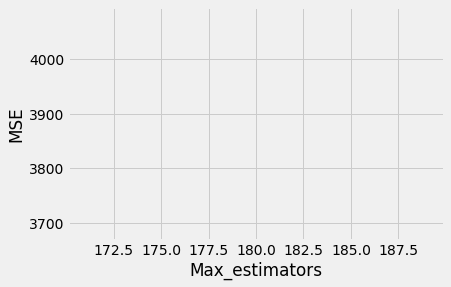

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(Max_estimators, MSE)
plt.xlabel('Max_estimators')
plt.ylabel('MSE')

### Modelo 3 - Random Forest

In [67]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor()
RFreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Analisis de n_estimators

In [98]:
# list of values to try for n_estimators
estimator_range = range(160, 220, 20)
list(estimator_range)

[160, 180, 200]

In [99]:
# list to store the average Accuracy for each value of n_estimators
MSE = []

for estimator in estimator_range:
    RFreg = RandomForestRegressor(bootstrap=True,criterion='mse',max_depth=None,n_estimators=estimator, 
                                  random_state=1, n_jobs=-1)
    
    # fit and predict
    RFreg.fit(X_train, y_train)
    y_pred = RFreg.predict(X_test)
    y_pred
    
    MSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))
print(MSE)

[3884.2984093056702, 3883.472058290761, 3881.813794659865]


In [100]:
# show the best MSE and the corresponding n_estimators
sorted(zip(MSE, estimator_range))[::1][0]

(3881.813794659865, 200)

Text(0,0.5,'MSE')

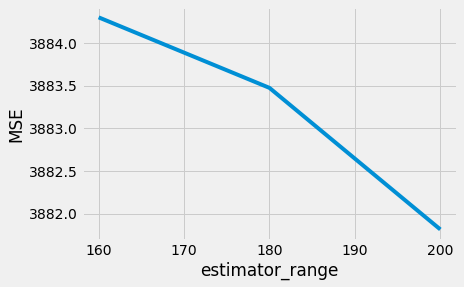

In [101]:
plt.plot(estimator_range, MSE)
plt.xlabel('estimator_range')
plt.ylabel('MSE')

In [74]:
# define features: exclude career statistics (which start with "C") and the response (Salary)
feature_cols = X_train.columns
feature_cols

Index(['Mileage', 'Y_1997', 'Y_1998', 'Y_1999', 'Y_2000', 'Y_2001', 'Y_2002',
       'Y_2003', 'Y_2004', 'Y_2005', 'Y_2006', 'Y_2007', 'Y_2008', 'Y_2009',
       'Y_2010', 'Y_2011', 'Y_2012', 'Y_2013', 'Y_2014', 'Y_2015', 'Y_2016',
       'Y_2017', 'Y_2018', 'State_0', 'State_1', 'State_2', 'State_3',
       'State_4', 'State_5', 'State_6', 'Make_0', 'Make_1', 'Make_2', 'Make_3',
       'Make_4', 'Make_5', 'Make_6', 'Model_0', 'Model_1', 'Model_2',
       'Model_3', 'Model_4', 'Model_5', 'Model_6', 'Model_7', 'Model_8',
       'Model_9', 'Model_10'],
      dtype='object')

#### Analisis Max Features

In [94]:
# list of values to try for max_features
feature_range = range(1, len(feature_cols)+1,2)
feature_range =[6,12,18,24,30,36,42,48]
list(feature_range)

[6, 12, 18, 24, 30, 36, 42, 48]

In [95]:
# list to store the average Accuracy for each value of max_features
MSE = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for feature in feature_range:
    RFreg = RandomForestRegressor(bootstrap=True,criterion='mse',max_features=feature, max_depth=20,n_estimators=50, 
                                  random_state=1, n_jobs=-1)
    # fit and predict
    RFreg.fit(X_train, y_train)
    y_pred = RFreg.predict(X_test)
    y_pred
    
    MSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [96]:
# show the best MSE and the corresponding n_estimators
sorted(zip(MSE, feature_range))[::1][0]

(3701.1381104243865, 24)

Text(0,0.5,'MSE')

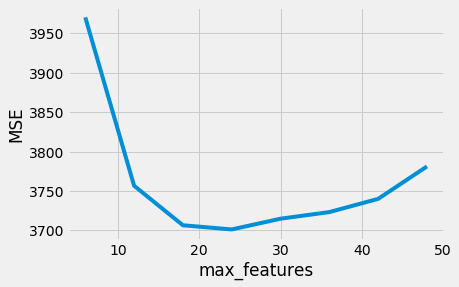

In [97]:
plt.plot(feature_range, MSE)
plt.xlabel('max_features')
plt.ylabel('MSE')

####  Analisis de max_depth

In [90]:
# list of values to try for max_features
max_depth = range(5, 30,5)
#max_depth =[12,24,48]
list(max_depth)

[5, 10, 15, 20, 25]

In [91]:
# list to store the average Accuracy for each value of max_features
MSE = []

# use 10-fold cross-validation with each value of max_features (WARNING: SLOW!)
for depth in max_depth:
    RFreg = RandomForestRegressor(bootstrap=True,criterion='mse',max_features=20, max_depth=depth, n_estimators=50, 
                                  random_state=1, n_jobs=-1)
    # fit and predict
    RFreg.fit(X_train, y_train)
    y_pred = RFreg.predict(X_test)
    y_pred
    
    MSE.append(np.sqrt(mean_squared_error(y_test, y_pred)))

In [92]:
# show the best MSE and the corresponding n_estimators
sorted(zip(MSE, max_depth))[::1][0]

(3703.862877584933, 20)

Text(0,0.5,'MSE')

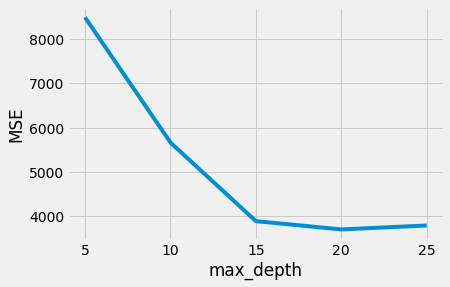

In [93]:
plt.plot(max_depth, MSE)
plt.xlabel('max_depth')
plt.ylabel('MSE')

### Fitting a Random Forest with the best parameters

In [102]:
# max_features=6 is best and n_estimators=200 is sufficiently large
RFreg = RandomForestRegressor(bootstrap=True,criterion='mse',max_features=24, max_depth=20,n_estimators=200, 
                                  random_state=1, n_jobs=-1)
# fit and predict
RFreg.fit(X_train, y_train)
y_pred = RFreg.predict(X_test)
y_pred
    
MSE=np.sqrt(mean_squared_error(y_test, y_pred))

In [103]:
print(MSE)

3682.5010065792126


## Ejecución del modelo completo y pronosticos de data_test (Identificacion del problema de tratar por separado el archivo de train y test

In [104]:
data_test['Year_s']=data_test[str('Year')]
Xd_1=pd.get_dummies(data_test['Year_s'], prefix='Y')
data2=pd.DataFrame(data_test['State'])
Xd_2 = ce.BinaryEncoder().fit_transform(data2)
data3=pd.DataFrame(data_test['Make'])
Xd_3 = ce.BinaryEncoder().fit_transform(data3)
data4=pd.DataFrame(data_test['Model'])
Xd_4 = ce.BinaryEncoder().fit_transform(data4)
Xd_test =pd.concat([data_test['Mileage'],Xd_1,Xd_2,Xd_3,Xd_4],axis=1)
Xd_test.head(10)

,Mileage,Y_1997,Y_1998,Y_1999,Y_2000,Y_2001,Y_2002,Y_2003,Y_2004,Y_2005,...,Model_1,Model_2,Model_3,Model_4,Model_5,Model_6,Model_7,Model_8,Model_9,Model_10
ID,,,,,,,,,,,,,,,,,,,,,
0,23388,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,45061,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,101033,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,13590,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,118916,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,82447,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
6,82939,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
7,122878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,35091,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [105]:
Xd_test.shape

(250000, 48)

In [106]:
X.shape

(500000, 48)

In [107]:
y.shape

(500000,)

In [110]:
# fit and predict
RFreg.fit(X, y)
y_pred = RFreg.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred.head(5)

,0
0,18195.310179
1,20099.779507
2,15799.738875
3,20352.354231
4,13220.869380


In [111]:
y_pred.shape

(250000, 1)

In [112]:
y_pred['Price_est']=y_pred.iloc[:,0]
y_pred.head(5)

,0,Price_est
0,18195.310179,18195.310179
1,20099.779507,20099.779507
2,15799.738875,15799.738875
3,20352.354231,20352.354231
4,13220.869380,13220.869380


In [113]:
y_pred=y_pred['Price_est']

In [114]:
y_pred.head(5)

0    18195.310179
1    20099.779507
2    15799.738875
3    20352.354231
4    13220.869380
Name: Price_est, dtype: float64

In [115]:
data_resp =pd.concat([data_test,y_pred],axis=1)
data_resp.head(10)

,Year,Mileage,State,Make,Model,Year_s,Price_est
ID,,,,,,,
0,2015,23388,OH,Ford,EscapeFWD,2015,18195.310179
1,2014,45061,PA,Ford,EscapeSE,2014,20099.779507
2,2007,101033,WI,Toyota,Camry4dr,2007,15799.738875
3,2015,13590,HI,Jeep,Wrangler,2015,20352.354231
4,2009,118916,CO,Dodge,Charger4dr,2009,13220.869380
5,2006,82447,OH,Chevrolet,Impala4dr,2006,15236.026031
6,2008,82939,FL,Honda,Accord,2008,13459.591350
7,2010,122878,TN,GMC,Yukon2WD,2010,15095.073604
8,2015,35091,OH,Honda,CivicEX,2015,45123.035931


In [68]:
Price_test=data_resp.groupby('Model')[['Price_est']].mean()
Price_test.head(10)

,Price_est
Model,
1,22841.275179
15002WD,21996.741423
15004WD,21319.817203
1500Laramie,22000.572471
1500Tradesman,20873.685850
200LX,20675.500699
200Limited,21399.718455
200S,21003.828827
200Touring,22019.617166


In [69]:
Price_analisis=pd.merge(Price_model,Price_test,on='Model')
Price_analisis.head(10)

,Price,Price_pred,Price_est
Model,,,
1,15377.592593,16283.546111,22841.275179
15002WD,18471.712803,17733.958366,21996.741423
15004WD,22643.614767,22316.212678,21319.817203
1500Laramie,34739.055118,34958.152811,22000.572471
1500Tradesman,28299.432432,30286.506306,20873.685850
200LX,12229.169231,12750.619398,20675.500699
200Limited,13458.866136,13506.278102,21399.718455
200S,15689.028090,16038.493459,21003.828827
200Touring,10397.879310,10611.178352,22019.617166


### Exportacion de Pronosticos

In [ ]:
y_pred.to_csv('test_submission.csv', index_label='ID')

### Submission example

In [121]:
import numpy as np

In [122]:
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(data_test.shape[0]) * 75000 + 5000, index=data_test.index, columns=['Price'])

In [123]:
y_pred.to_csv('test_submission1.csv', index_label='ID')

In [124]:
y_pred.head()

,Price
ID,
0,33090.508914
1,76303.572981
2,59899.545636
3,49899.386315
4,16701.398033


# Exercise P1.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
